In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from src.L96 import *
from src.utils import *
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10,7)
sns.set_style('dark')
sns.set_context('talk')

In [20]:
l96 = L96OneLevel(K=10)
l96.iterate(100)
initX = l96.X

KeyboardInterrupt: 

In [45]:
l96_true = L96OneLevel(K=10, F=10., X_init=initX.copy(), dt=0.01, noprog=True)
l96_model = L96OneLevel(K=10, F=12., X_init=initX.copy(), dt=0.01, noprog=True)

In [46]:
l96_true.iterate(0.75)
l96_model.iterate(0.75)

/home/rasp/miniconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:219: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


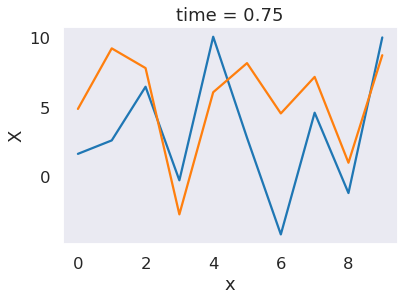

In [47]:
l96_true.history.X.isel(time=-1).plot()
l96_model.history.X.isel(time=-1).plot()

In [49]:
truths = []
forecasts = []
for i in tqdm(range(1000)):
    l96_model.X = l96_true.X.copy()
    l96_true.iterate(0.75)
    l96_model.iterate(0.75)
    truths.append(l96_true.X.copy())
    forecasts.append(l96_model.X.copy())

In [52]:
truths = np.array(truths)
forecasts = np.array(forecasts)

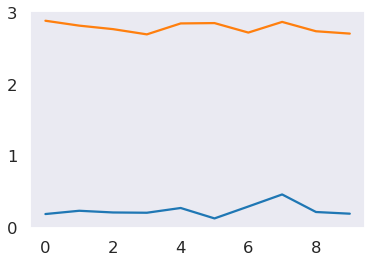

In [56]:
plt.plot((forecasts - truths).mean(0))
plt.plot((forecasts - truths).std(0))

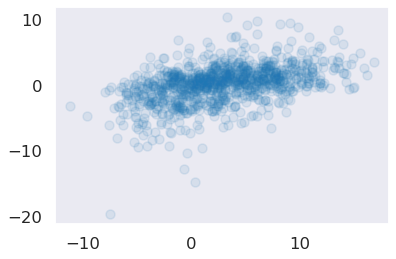

In [69]:
plt.scatter(
    forecasts.flatten()[::10],
    (forecasts - truths).flatten()[::10],
    alpha=0.1
)